# How much influence do the different statistics have on each other?
### The survey was conducted using a heat map chart
### Interesting issues:
1. Influence on/off shooting,
2. Influence on/off ADJOE and ADJDE stats,
3. Influence on/off seed placement and playoffs results,
4. Influence on/off number of games played.

Data source:
https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('databases/cbb.csv', header=None, skiprows=1)

header = pd.read_csv('databases/cbb.csv', nrows=1, header=None).iloc[0].tolist()
df.columns = header

df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


## Mapping the post-season results to representation in numbers and making them usable on a heat map

In [3]:
df = df.sort_values(by='YEAR').reset_index(drop=True)
postseason_mapping = {"R68": 1, "R64": 1, "R32": 2, "S16": 3, "E8": 4, "F4": 5, "2ND": 6, "Champions": 7, "No Playoffs": 0}
df['POSTSEASON'] = df['POSTSEASON'].fillna("No Playoffs")
df['POSTSEASON_MAP'] = df['POSTSEASON'].map(postseason_mapping)

df.sample(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_MAP
1053,Saint Joseph's,A10,36,28,114.2,97.6,0.8600,51.2,48.1,14.3,...,52.3,49.2,32.7,31.1,70.9,3.4,R32,8.0,2016,2
1908,Appalachian St.,SB,31,15,102.5,106.3,0.3985,49.9,51.3,18.9,...,49.9,48.7,33.3,37.9,71.2,-12.4,No Playoffs,NaN,2018,0
1843,Stanford,P12,35,19,107.6,98.5,0.7341,51.9,49.7,20.6,...,50.3,47.9,36.9,35.1,71.9,-4.3,No Playoffs,NaN,2018,0
462,Morgan St.,MEAC,31,15,99.8,105.3,0.3509,46.5,48.6,18.4,...,49.5,46.6,26.1,35.6,69.6,-10.1,No Playoffs,NaN,2014,0
2700,Wisconsin,B10,29,17,111.3,90.4,0.9163,49.4,47.9,13.5,...,46.3,47.1,36.0,33.0,65.0,2.2,R32,9.0,2021,2


## Creating a heat-map chart with all numerical features

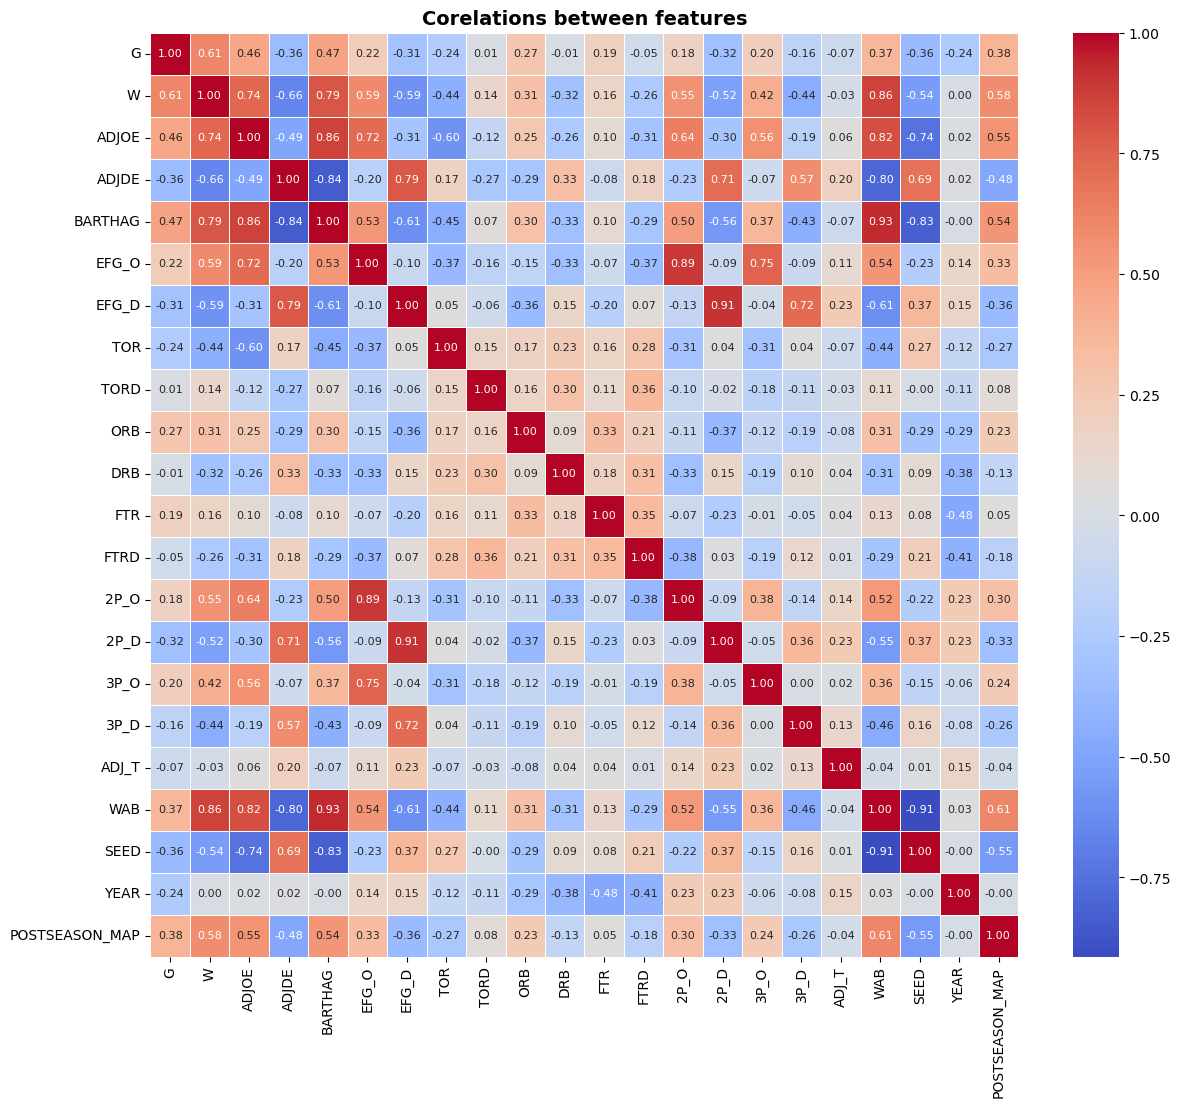

In [4]:
df_numeric = df.select_dtypes(include=['number'])  

plt.figure(figsize=(14,12))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 8}, fmt=".2f", linewidths=0.5)
plt.title("Corelations between features", fontsize=14, fontweight='bold')
plt.show()

#### **SEED**
For a higher place at the end of the regular season, the high influence (as you might guess) is winning games **[W]** with a score of -0.54.

Of the less obvious ones, **[BARTHAG]** (-0.83) and **[ADJDE]** (0.69) along with **[ADJOE]** (-0.74) have the greatest impact. One can see a slight, but nonetheless, advantage of **[ADJOE]**'s offensive effectiveness over **[ADJDE]**'s defensive effectiveness.

Another interesting item is the number of games **[G]** with a score of -0.36, which means that the fewer games played (in the NCAA their number varies between divisions and conferences) the higher (worse) the seed at the end of the season.

Another interesting feature is the result in the tournament **[POSTSEASON_MAP]** with a correlation score of -0.55, which means that the higher the **[SEED]**, the worse the result in the playoffs **[POSTSEASON_MAP]**. Interestingly, however, the correlation is quite weak, although one would expect a higher correlation.

#### **YEAR**
As for the passage of years **[YEAR]**, it was possible to analyze how basketball in the NCAA has changed over the years - but no great correlations were noted.

The trait concerning time **[YEAR]** had a slight, but nevertheless, influence on the number of games **[G]** - decreasingly.

Its effect on the traits relating to 2-point throws - **[2P_O]** and **[2P_D]** - is evident, and with both having a value of 0.23.

Most interesting is the decrease in free throws represented by the **[FTR]** and **[FTRD]** traits (-0.48 and -0.41)- the **[YEAR]** trait has a large, negative, impact, which means a decreasing number of free throws in matches.

#### **WON GAMES**
The overall, aggregate number of games won **[W]** correlates strongly or significantly with a number of traits - whether statistics relating to offensive and defensive efficiency (**[ADJOE]** and **[ADJDE]**), or shooting efficiency **[EFG_O]** or shooting efficiency **[2P_O]** and **[3P_O]**. But what has the weakest correlation, that is, has the least impact on each other?

Certainly the number of free throws: made by one's own team **[FTR]** (0.16) and made by the opponent **[FTRD]** (-0.26). Ball losses committed by the opponent (steals by one's own team), also have a weak impact: **[TORD]** (0.14), although one's own ball losses  have a large impact: **[TOR]** (-0.44). The correlation with the pace of play of the action **[ADJ_T]** is also close to zero, as it is only -0.03.

## I encourage you to find your own dependencies!